In [18]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.xls", sep='\t')
data.head()
meta = pd.read_csv('metadata.txt', sep='\t', index_col='Cell_ID')
meta

,cell_types,week,Gene_num,Pre_Map_Reads,Aligned_Reads,MappingRate,pfc
Cell_ID,,,,,,,
GW08_PFC1_sc1,Neurons,GW08,4405,5941167,4622105,77.80%,PFC1
GW08_PFC1_sc11,Stem cells,GW08,2058,544878,418086,76.70%,PFC1
GW08_PFC1_sc12,Neurons,GW08,2967,778157,604185,77.60%,PFC1
GW08_PFC1_sc13,Neurons,GW08,2348,792592,604056,76.20%,PFC1
GW08_PFC1_sc14,Neurons,GW08,2410,983852,790058,80.30%,PFC1
...,...,...,...,...,...,...,...
GW26_PFC1_R4_sc4,GABAergic neurons,GW26,5591,9227153,5002961,54.20%,PFC1
GW26_PFC1_R4_sc5,GABAergic neurons,GW26,2169,1141079,639738,56.10%,PFC1
GW26_PFC1_R4_sc6,GABAergic neurons,GW26,3492,2640128,1370496,51.90%,PFC1


In [3]:
adata_mtx = data.T
adata_mtx

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GW08_PFC1_sc1,4.54,0.0,0.0,4.54,0.00,0.0,0.0,0.0,4.54,0.0,...,4.54,4.54,0.00,0.00,45.40,0.0,4.54,0.00,0.0,0.00
GW08_PFC1_sc2,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,81.19,0.00,0.00,0.00,0.0,108.25,0.00,0.0,0.00
GW08_PFC1_sc3,0.00,0.0,0.0,8.87,0.00,0.0,0.0,0.0,0.00,0.0,...,124.25,0.00,0.00,0.00,0.00,0.0,8.87,124.25,0.0,35.50
GW08_PFC1_sc4,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,189.05,0.00,0.0,0.00,0.00,0.0,0.00
GW08_PFC1_sc5,0.00,0.0,0.0,872.68,2.19,0.0,0.0,0.0,0.00,0.0,...,2.19,461.49,0.00,0.00,0.00,0.0,0.00,65.62,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW23_PFC2_SF2_F25_sc46,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,209.61,0.00,0.0,513.87
GW23_PFC2_SF2_F25_sc47,0.00,0.0,0.0,3.25,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,234.26,286.32,0.0,273.30,3.25,0.0,0.00
GW23_PFC2_SF2_F25_sc48,0.00,0.0,0.0,2.60,0.00,0.0,0.0,0.0,0.00,0.0,...,15.60,2.60,182.04,0.00,0.00,0.0,106.62,241.85,0.0,0.00
GW23_PFC2_SF2_F25_sc49,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11.61,0.0,5.81


In [8]:
# adata_mtx.set_index('Cell_ID', inplace=True)
filtered_adata = adata_mtx.loc[adata_mtx.index.isin(meta['Cell_ID'])]
filtered_adata
# adata_mtx

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GW08_PFC1_sc1,4.54,0.0,0.0,4.54,0.00,0.0,0.0,0.0,4.54,0.0,...,4.54,4.54,0.00,0.00,45.40,0.0,4.54,0.00,0.0,0.00
GW08_PFC1_sc2,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,81.19,0.00,0.00,0.00,0.0,108.25,0.00,0.0,0.00
GW08_PFC1_sc3,0.00,0.0,0.0,8.87,0.00,0.0,0.0,0.0,0.00,0.0,...,124.25,0.00,0.00,0.00,0.00,0.0,8.87,124.25,0.0,35.50
GW08_PFC1_sc4,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,189.05,0.00,0.0,0.00,0.00,0.0,0.00
GW08_PFC1_sc5,0.00,0.0,0.0,872.68,2.19,0.0,0.0,0.0,0.00,0.0,...,2.19,461.49,0.00,0.00,0.00,0.0,0.00,65.62,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW23_PFC2_SF2_F25_sc46,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,209.61,0.00,0.0,513.87
GW23_PFC2_SF2_F25_sc47,0.00,0.0,0.0,3.25,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,234.26,286.32,0.0,273.30,3.25,0.0,0.00
GW23_PFC2_SF2_F25_sc48,0.00,0.0,0.0,2.60,0.00,0.0,0.0,0.0,0.00,0.0,...,15.60,2.60,182.04,0.00,0.00,0.0,106.62,241.85,0.0,0.00
GW23_PFC2_SF2_F25_sc49,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11.61,0.0,5.81


In [31]:
import anndata as ad
if filtered_adata.index.name is None:
    filtered_adata.index.name = 'Cell_ID'
meta.index.name = 'Cell_ID'
filtered_adata = filtered_adata.reindex(meta.index)
meta = meta.loc[meta.index.intersection(filtered_adata.index)]
adata = ad.AnnData(X=filtered_adata, obs=meta)
adata.write('data.h5ad')

/mnt/disk/mwang/conda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/mnt/disk/mwang/conda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/mnt/disk/mwang/conda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/mnt/disk/mwang/conda3/lib/python3.11/site-packages/anndata/_core/anndata.p

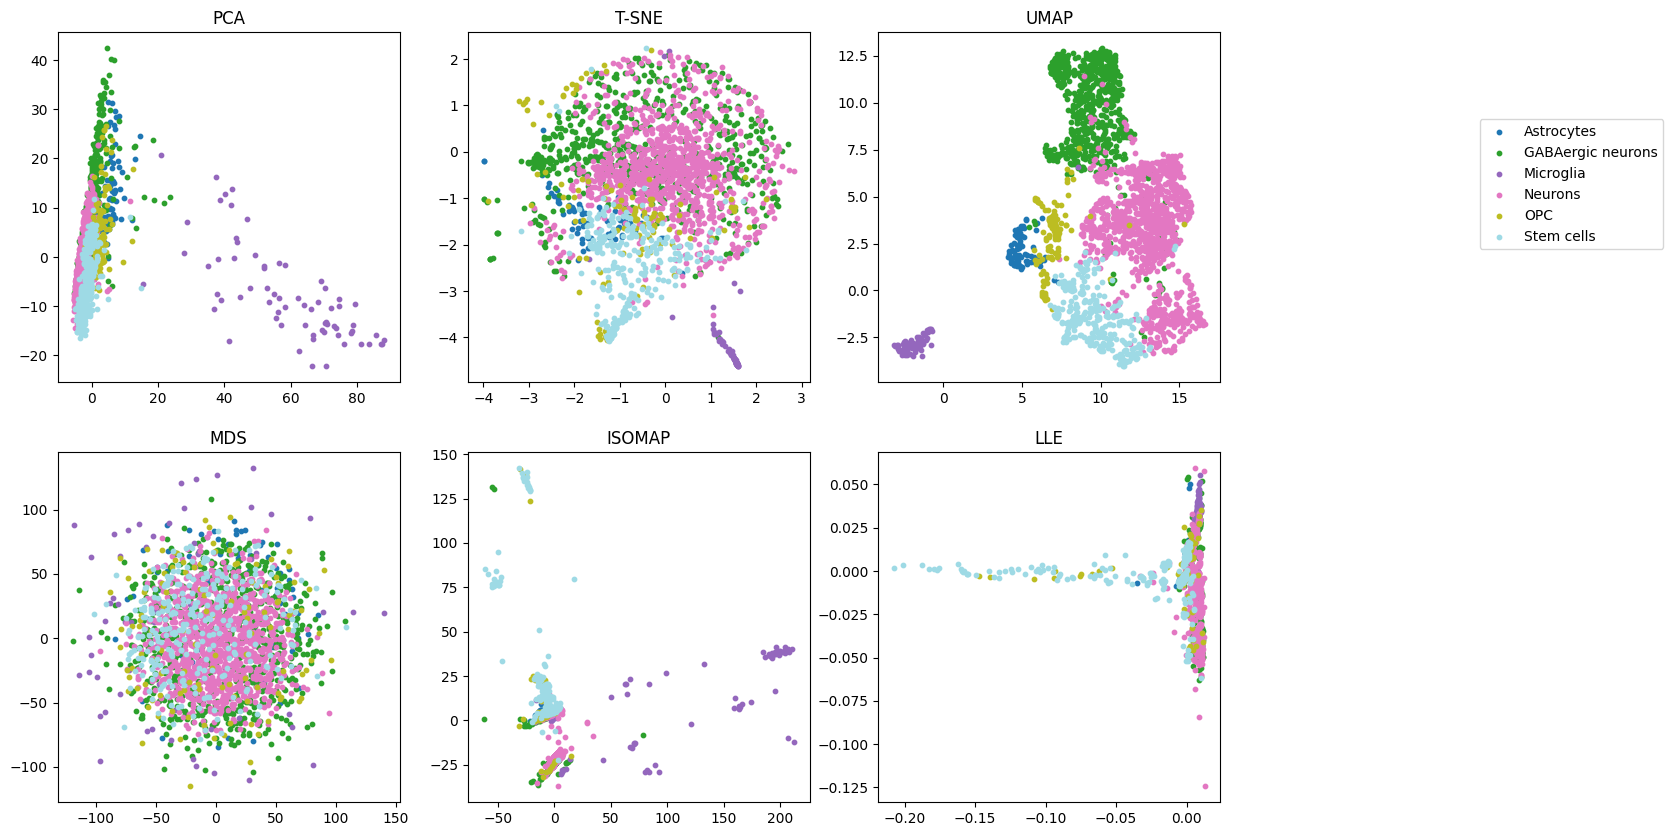

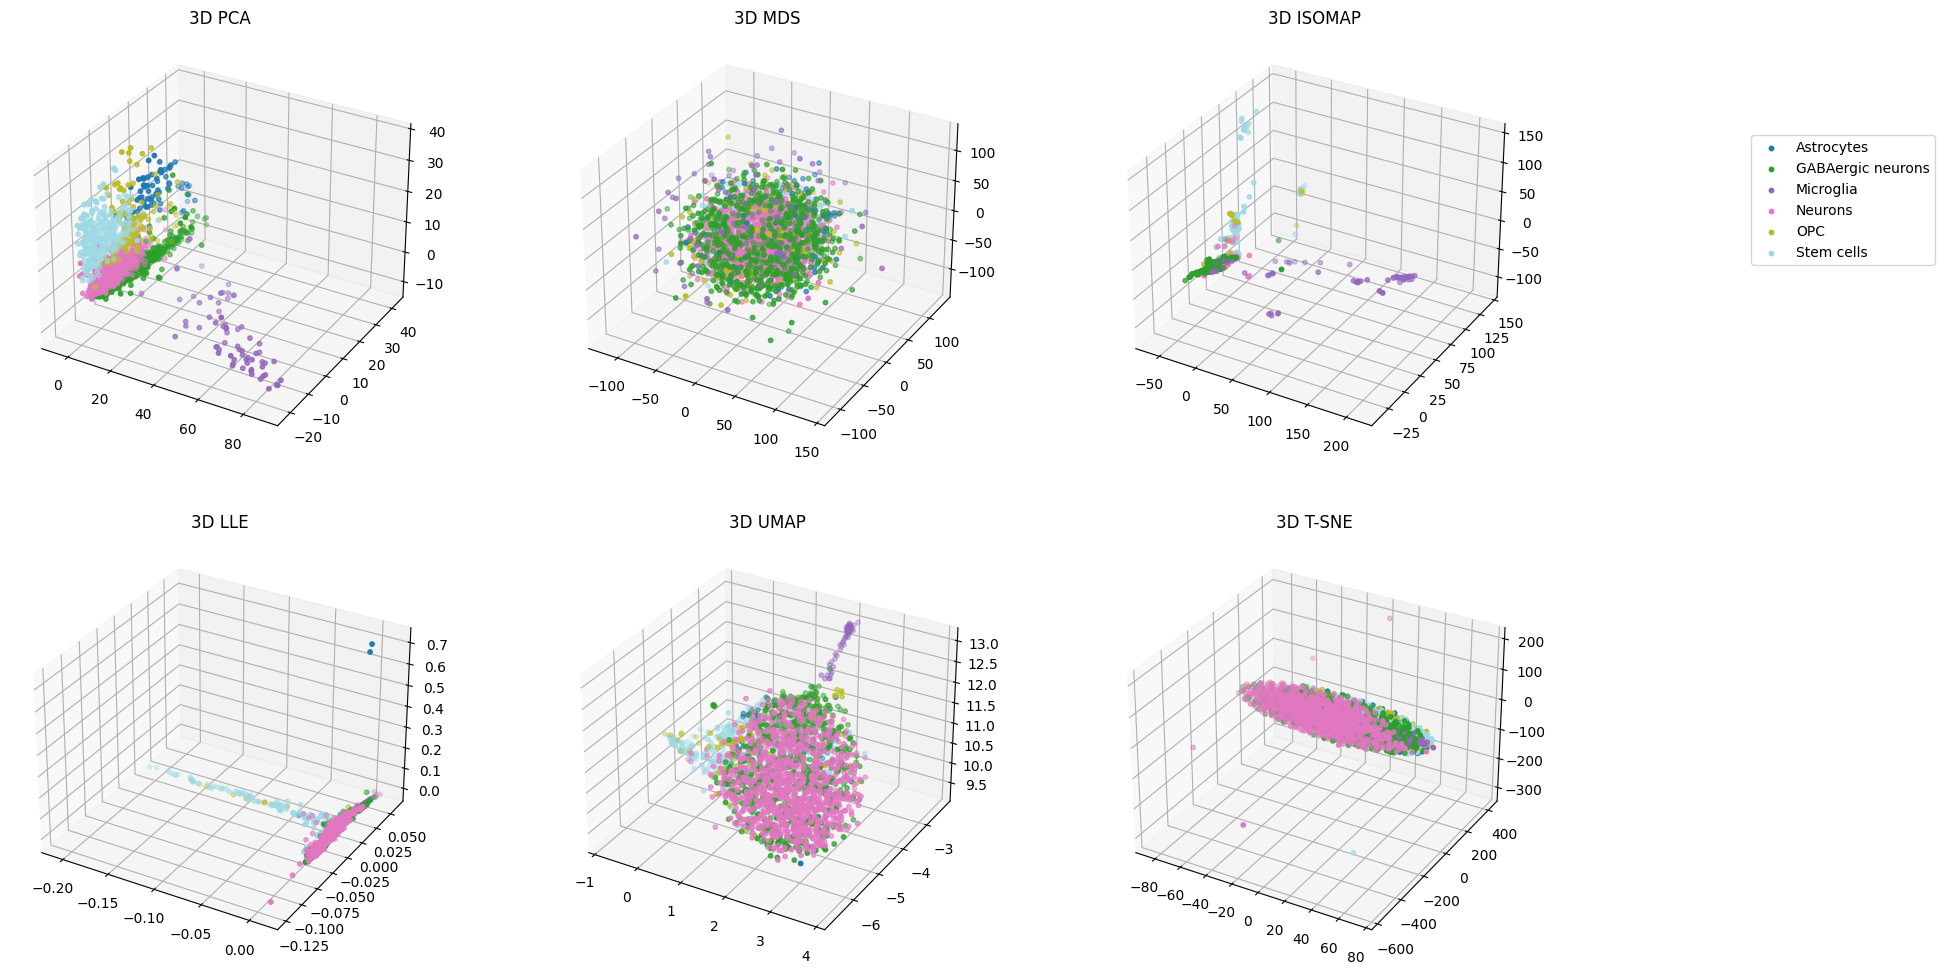

In [42]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# https://blog.csdn.net/weixin_60734652/article/details/133394826
adata = sc.read_h5ad('data.h5ad')  

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.tl.pca(adata, svd_solver='arpack')
X = StandardScaler().fit_transform(adata.X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
X_umap = adata.obsm['X_umap']
mds = MDS(n_components=3)
X_mds = mds.fit_transform(X)
isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X)
lle = LocallyLinearEmbedding(n_components=3)
X_lle = lle.fit_transform(X)
point_size = 10 
cell_types = adata.obs['cell_types']
unique_types = np.unique(cell_types)
colors = plt.cm.get_cmap('tab20', len(unique_types))
color_map = {cell_type: colors(i) for i, cell_type in enumerate(unique_types)}
import umap
reducer = umap.UMAP(n_components=3)
X_umap_3d = reducer.fit_transform(X)
tsne_3d = TSNE(n_components=3, random_state=42) 
X_tsne_3d = tsne_3d.fit_transform(X)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plots = []
labels = []
for i, (method, X_embedded) in enumerate([('PCA', X_pca), ('T-SNE', X_tsne), ('UMAP', X_umap), ('MDS', X_mds), ('ISOMAP', X_isomap), ('LLE', X_lle)]):
    ax = axs[i // 3, i % 3]
    for type_ in unique_types:
        indices = cell_types == type_
        plot = ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], color=color_map[type_], s=point_size)
        if type_ not in labels:
            plots.append(plot)
            labels.append(type_)
    ax.set_title(method)
fig.legend(plots, labels, loc='upper right', bbox_to_anchor=(1.2, 0.8))
fig = plt.figure(figsize=(20, 12))
axs_3d = []
for i, method in enumerate(['PCA', 'MDS', 'ISOMAP', 'LLE', 'UMAP', 'T-SNE']):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    axs_3d.append(ax)
    ax.set_title(f'3D {method}')

for ax, (method, X_embedded) in zip(axs_3d, [('PCA', X_pca), ('MDS', X_mds), ('ISOMAP', X_isomap), ('LLE', X_lle), ('UMAP', X_umap_3d), ('T-SNE', X_tsne_3d)]):
    for type_ in unique_types:
        indices = cell_types == type_
        ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], X_embedded[indices, 2], color=color_map[type_], s=point_size)
fig.legend(plots, labels, loc='upper right', bbox_to_anchor=(1.1, 0.8))

plt.show()

/mnt/disk/mwang/conda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/mnt/disk/mwang/conda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/mnt/disk/mwang/conda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/mnt/disk/mwang/conda3/lib/python3.11/site-packages/anndata/_core/anndata.p

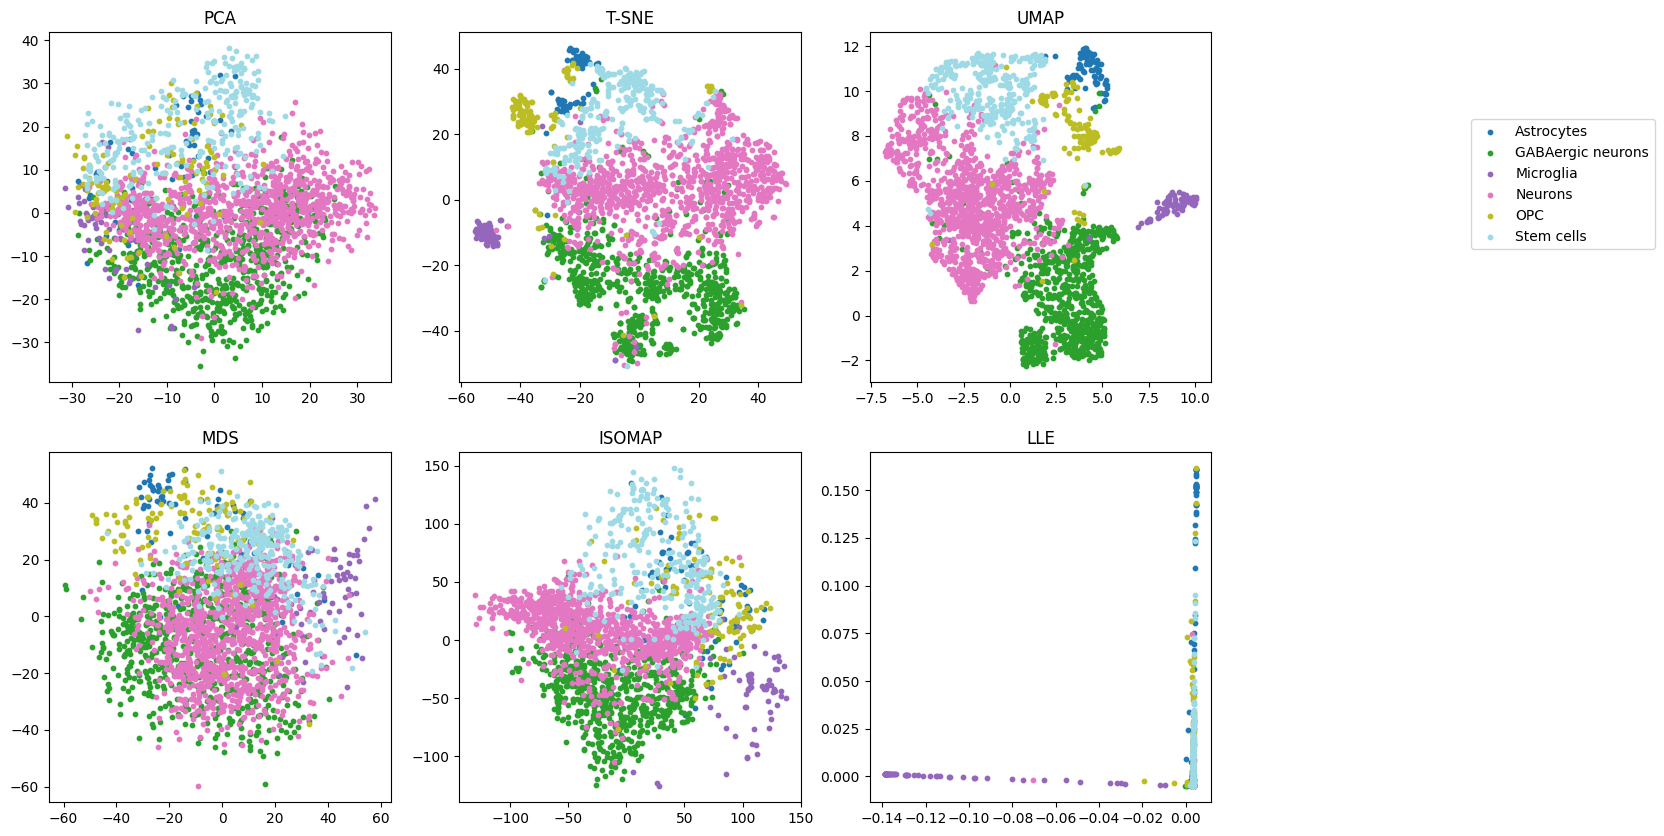

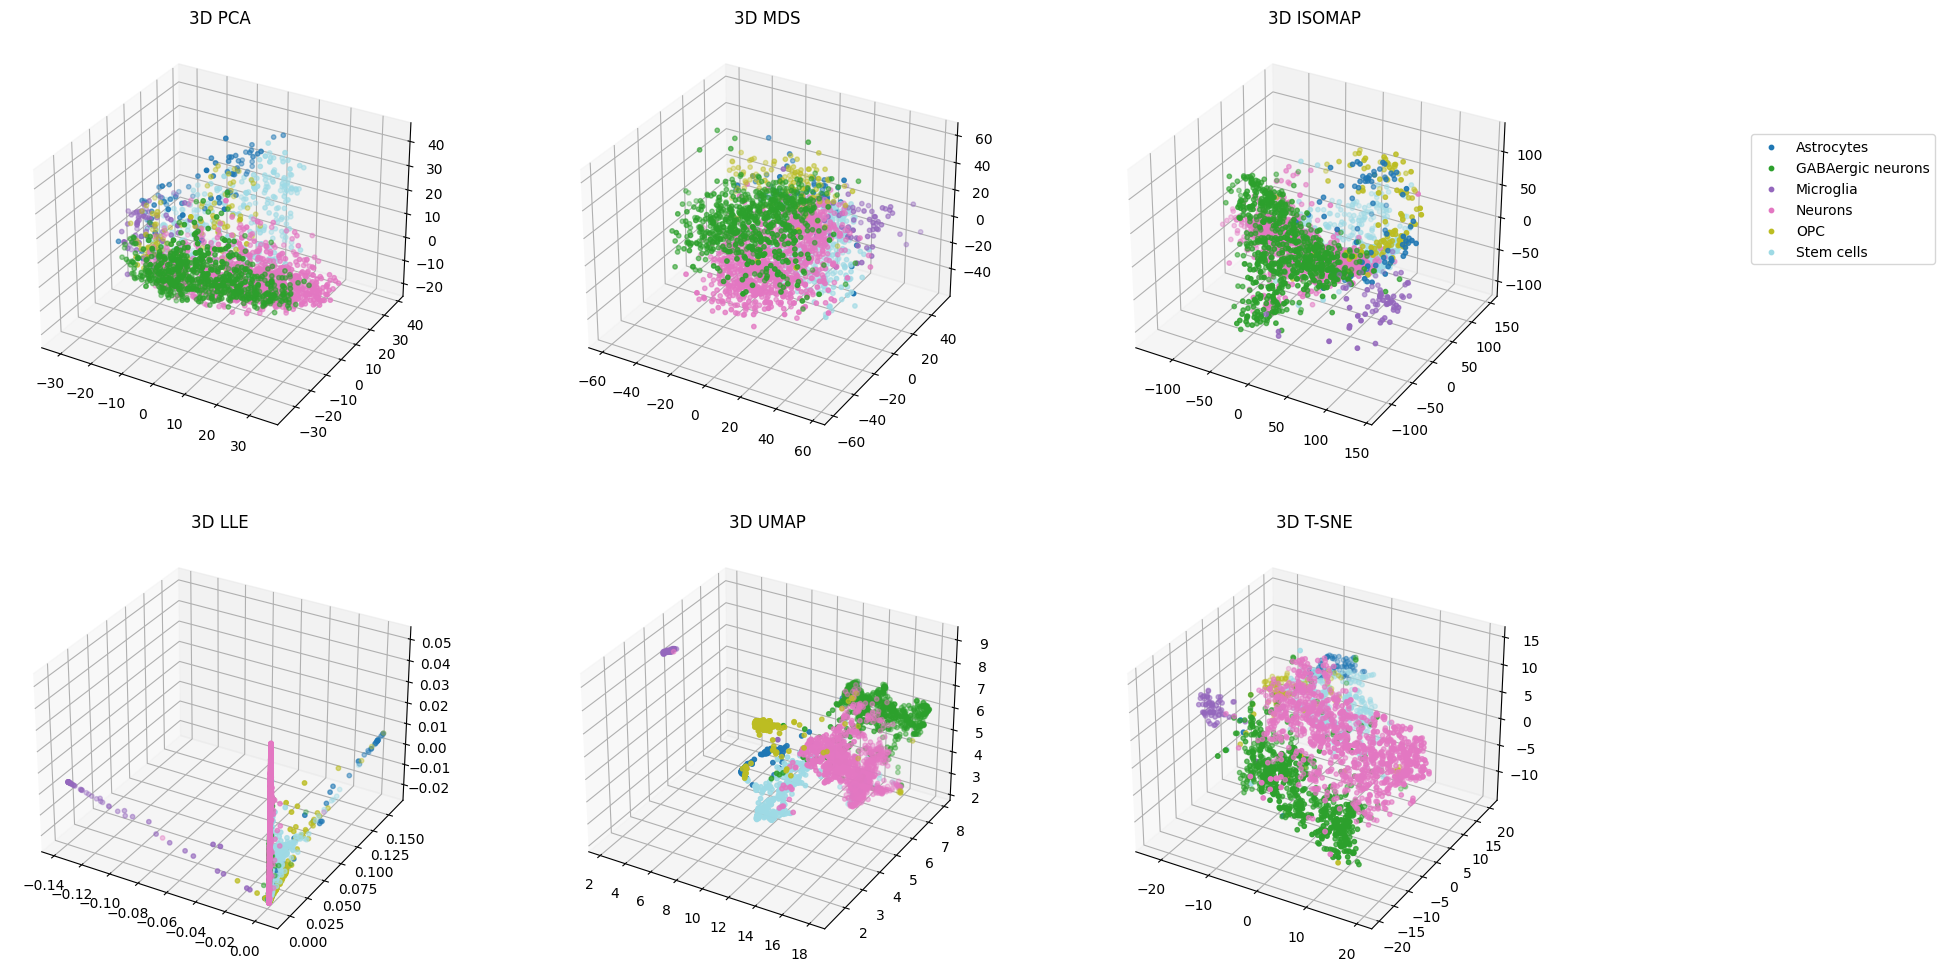

In [44]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# https://blog.csdn.net/weixin_60734652/article/details/133394826
adata = sc.read_h5ad('./uce/data_uce_adata.h5ad')  

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.tl.pca(adata, svd_solver='arpack')
X = StandardScaler().fit_transform(adata.obsm["X_uce"])
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
X_umap = adata.obsm['X_umap']
mds = MDS(n_components=3)
X_mds = mds.fit_transform(X)
isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X)
lle = LocallyLinearEmbedding(n_components=3)
X_lle = lle.fit_transform(X)
point_size = 10
cell_types = adata.obs['cell_types']
unique_types = np.unique(cell_types)
colors = plt.cm.get_cmap('tab20', len(unique_types))
color_map = {cell_type: colors(i) for i, cell_type in enumerate(unique_types)}
import umap
reducer = umap.UMAP(n_components=3)
X_umap_3d = reducer.fit_transform(X)
tsne_3d = TSNE(n_components=3, random_state=42) 
X_tsne_3d = tsne_3d.fit_transform(X)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plots = []
labels = []
for i, (method, X_embedded) in enumerate([('PCA', X_pca), ('T-SNE', X_tsne), ('UMAP', X_umap), ('MDS', X_mds), ('ISOMAP', X_isomap), ('LLE', X_lle)]):
    ax = axs[i // 3, i % 3]
    for type_ in unique_types:
        indices = cell_types == type_
        plot = ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], color=color_map[type_], s=point_size)
        if type_ not in labels:
            plots.append(plot)
            labels.append(type_)
    ax.set_title(method)
fig.legend(plots, labels, loc='upper right', bbox_to_anchor=(1.2, 0.8))
fig = plt.figure(figsize=(20, 12))
axs_3d = []
for i, method in enumerate(['PCA', 'MDS', 'ISOMAP', 'LLE', 'UMAP', 'T-SNE']):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    axs_3d.append(ax)
    ax.set_title(f'3D {method}')

for ax, (method, X_embedded) in zip(axs_3d, [('PCA', X_pca), ('MDS', X_mds), ('ISOMAP', X_isomap), ('LLE', X_lle), ('UMAP', X_umap_3d), ('T-SNE', X_tsne_3d)]):
    for type_ in unique_types:
        indices = cell_types == type_
        ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], X_embedded[indices, 2], color=color_map[type_], s=point_size)
fig.legend(plots, labels, loc='upper right', bbox_to_anchor=(1.1, 0.8))

plt.show()

### For UCE usage, please follow their github [guideline](https://github.com/snap-stanford/UCE).